In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import h5py

In [94]:
def unpack_hdf5(hdf5_file):
    with h5py.File(hdf5_file, 'r') as f:
        data = unpack_hdf5_(f)
    return data

def unpack_hdf5_(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = unpack_hdf5_(group[key])
        else:
            data[key] = group[key][()]
    return data

In [95]:
data_autopi_hh = unpack_hdf5('../data/raw/AutoPi_CAN/platoon_CPH1_HH.hdf5')
data_autopi_vh = unpack_hdf5('../data/raw/AutoPi_CAN/platoon_CPH1_VH.hdf5')

In [96]:
vehicles = ['GM', 'aran', 'gopro', 'p79']

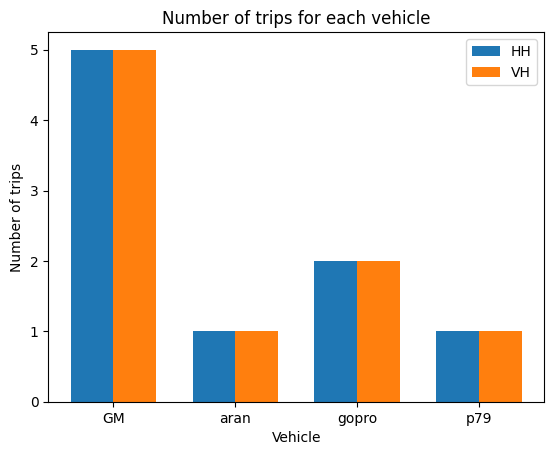

In [98]:
 # Barplot of number of trips for each vehicle hh and vh
num_trips_hh = []
num_trips_vh = []
for vehicle in vehicles:
    num_trips_hh.append(len(data_autopi_hh[vehicle].keys()))
    num_trips_vh.append(len(data_autopi_vh[vehicle].keys()))

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(vehicles))
rects1 = ax.bar(index, num_trips_hh, bar_width, label='HH')
rects2 = ax.bar(index + bar_width, num_trips_vh, bar_width, label='VH')
ax.set_xlabel('Vehicle')
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips for each vehicle')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(vehicles)
ax.legend()
plt.savefig('../reports/figures/num_trips_vehicles.pdf')
plt.show()

In [6]:
data_autopi_hh['gopro']['trip_1'].keys()

dict_keys(['pass_1', 'pass_3', 'pass_5', 'pass_7', 'pass_9'])

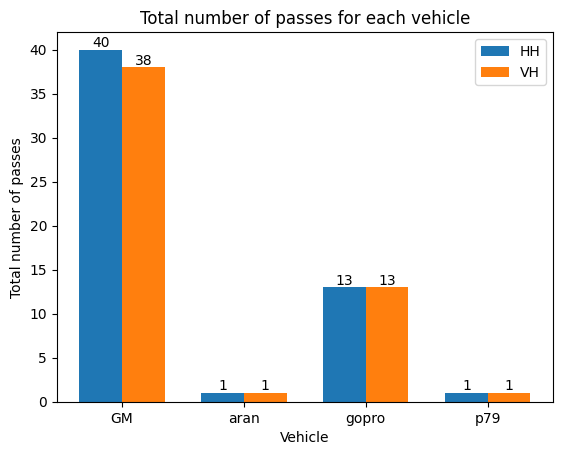

In [99]:
# Barplot of the total number of passes for each vehicle hh and vh
num_passes_hh = []
num_passes_vh = []
for vehicle in vehicles:
    num_passes_hh.append(np.sum([len(data_autopi_hh[vehicle][trip]) for trip in data_autopi_hh[vehicle].keys()]))
    num_passes_vh.append(np.sum([len(data_autopi_vh[vehicle][trip]) for trip in data_autopi_vh[vehicle].keys()]))

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(vehicles))
rects1 = ax.bar(index, num_passes_hh, bar_width, label='HH')
rects2 = ax.bar(index + bar_width, num_passes_vh, bar_width, label='VH')

ax.set_xlabel('Vehicle')
ax.set_ylabel('Total number of passes')
ax.set_title('Total number of passes for each vehicle')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(vehicles)
ax.legend()

# Add numbers to the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.savefig('../reports/figures/num_passes_vehicles.pdf')

plt.show()

In [109]:
def get_samples(data, vehicle, attributes, num_attributes):
    num = 0
    for trip in data_autopi_hh[vehicle].keys():
        for pass_ in data_autopi_hh[vehicle][trip].keys():
            num += 1
            for attribute in attributes:
                if attribute == 'Velocity':
                    num_attributes[attribute] += len(data_autopi_hh[vehicle][trip][pass_][attribute]["Acceleration"])
                    continue
                num_attributes[attribute] += len(data_autopi_hh[vehicle][trip][pass_][attribute])
    num_attributes = {k: v / num for k, v in num_attributes.items()}
    return num_attributes

# Barplot of the average number of samples for each attribute over all passes for GM for hh and vh
def plot_average_number_of_samples(vehicle, attributes, log=False, figsize=(20, 10), number_on_bars=False):
    # attributes = data_autopi_hh['GM']['16006']['pass_1'].keys()
    num_attributes_hh = {k: 0 for k in attributes}
    num_attributes_vh = {k: 0 for k in attributes}

    num_attributes_hh = get_samples(data_autopi_hh, vehicle, attributes, num_attributes_hh)
    num_attributes_vh = get_samples(data_autopi_vh, vehicle, attributes, num_attributes_vh)

    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    index = np.arange(len(attributes)) 
    rects1 = ax.bar(index, num_attributes_hh.values(), bar_width, label='HH')
    rects2 = ax.bar(index + bar_width, num_attributes_vh.values(), bar_width, label='VH')

    if number_on_bars:
        # Add numbers to the bars
        for rect in rects1 + rects2:
            height = int(rect.get_height())
            ax.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
    ax.set_xlabel('Attribute')
    ax.set_ylabel('Average number of samples')
    ax.set_title('Average number of samples for each attribute')
    ax.set_xticks(index)
    ax.set_xticklabels(attributes, rotation=70)
    # log scale
    filename = f'../reports/figures/avg_num_samples_{vehicle}_normal.pdf'
    if log:
        ax.set_yscale('log')
        ax.set_yticks([1, 10, 100, 1000, 10000])
        # ax.set_yticks([1, 50, 500, 5000, 50000])
        filename = f'../reports/figures/avg_num_samples_{vehicle}_log.pdf'
    ax.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

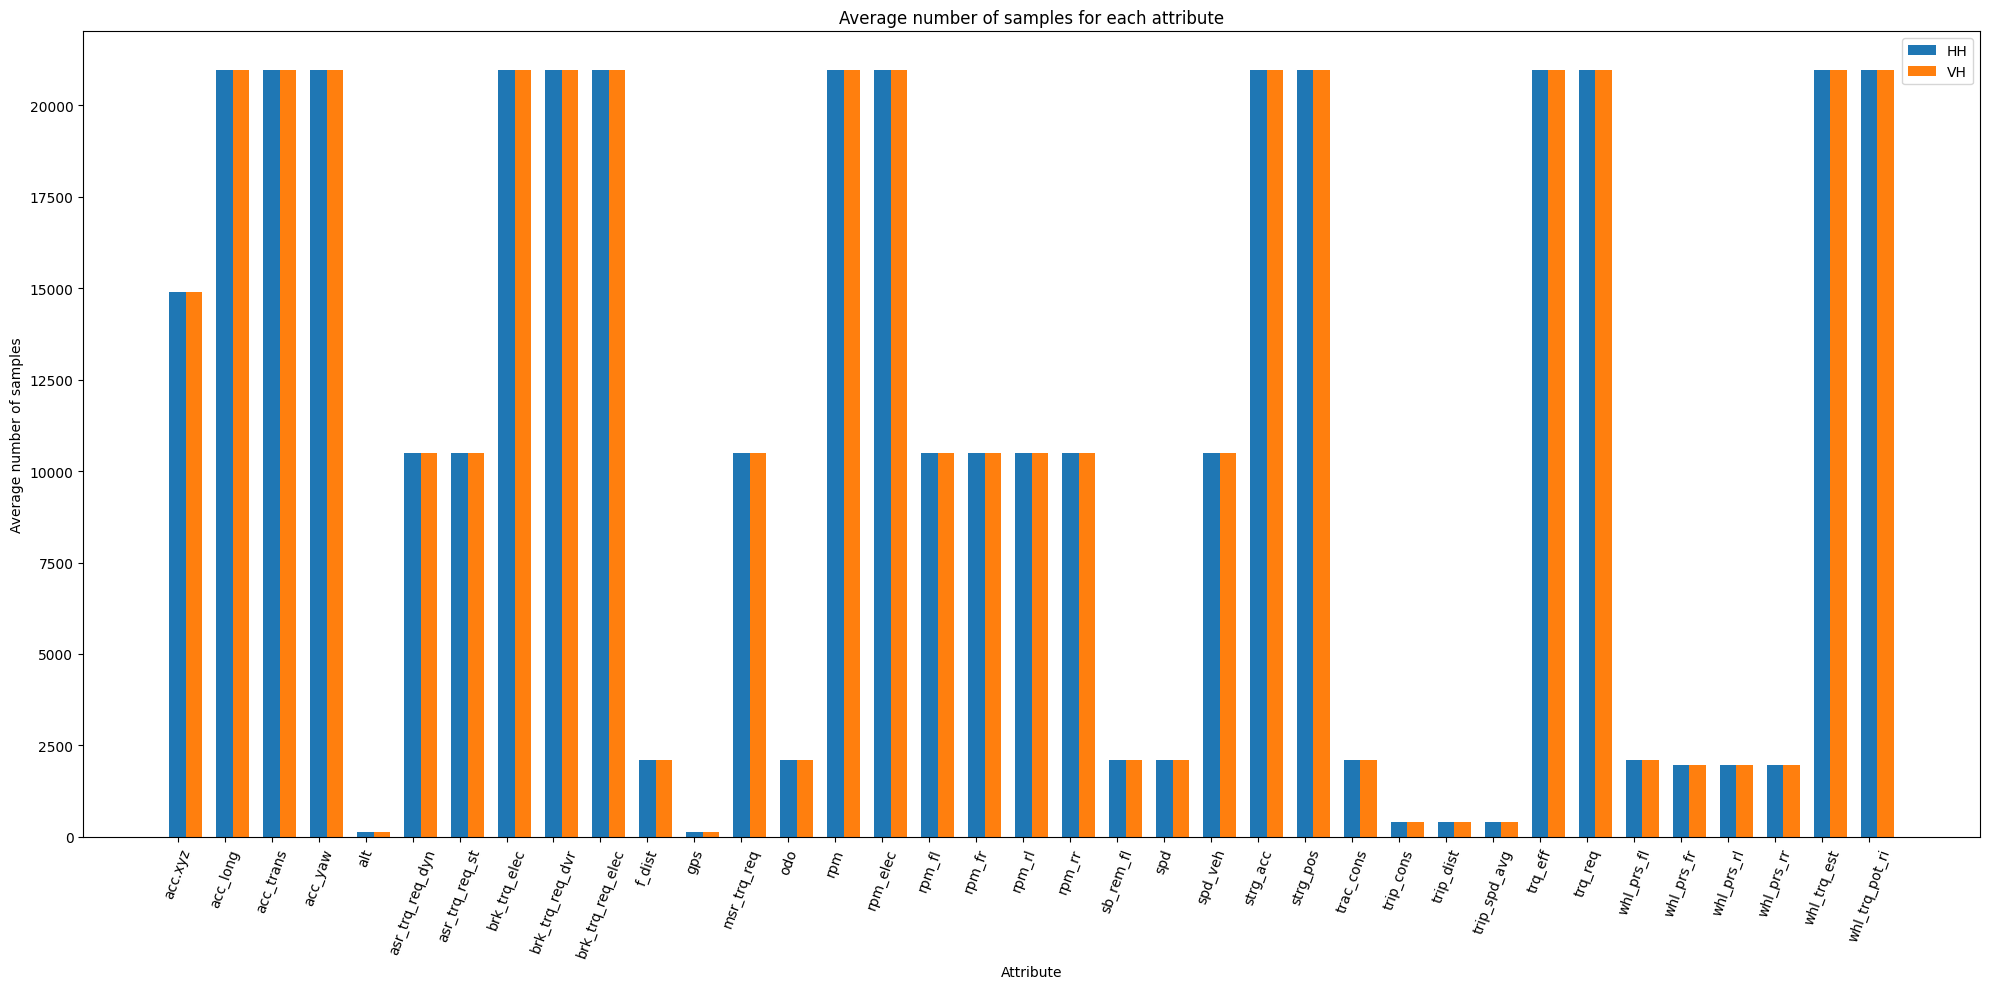

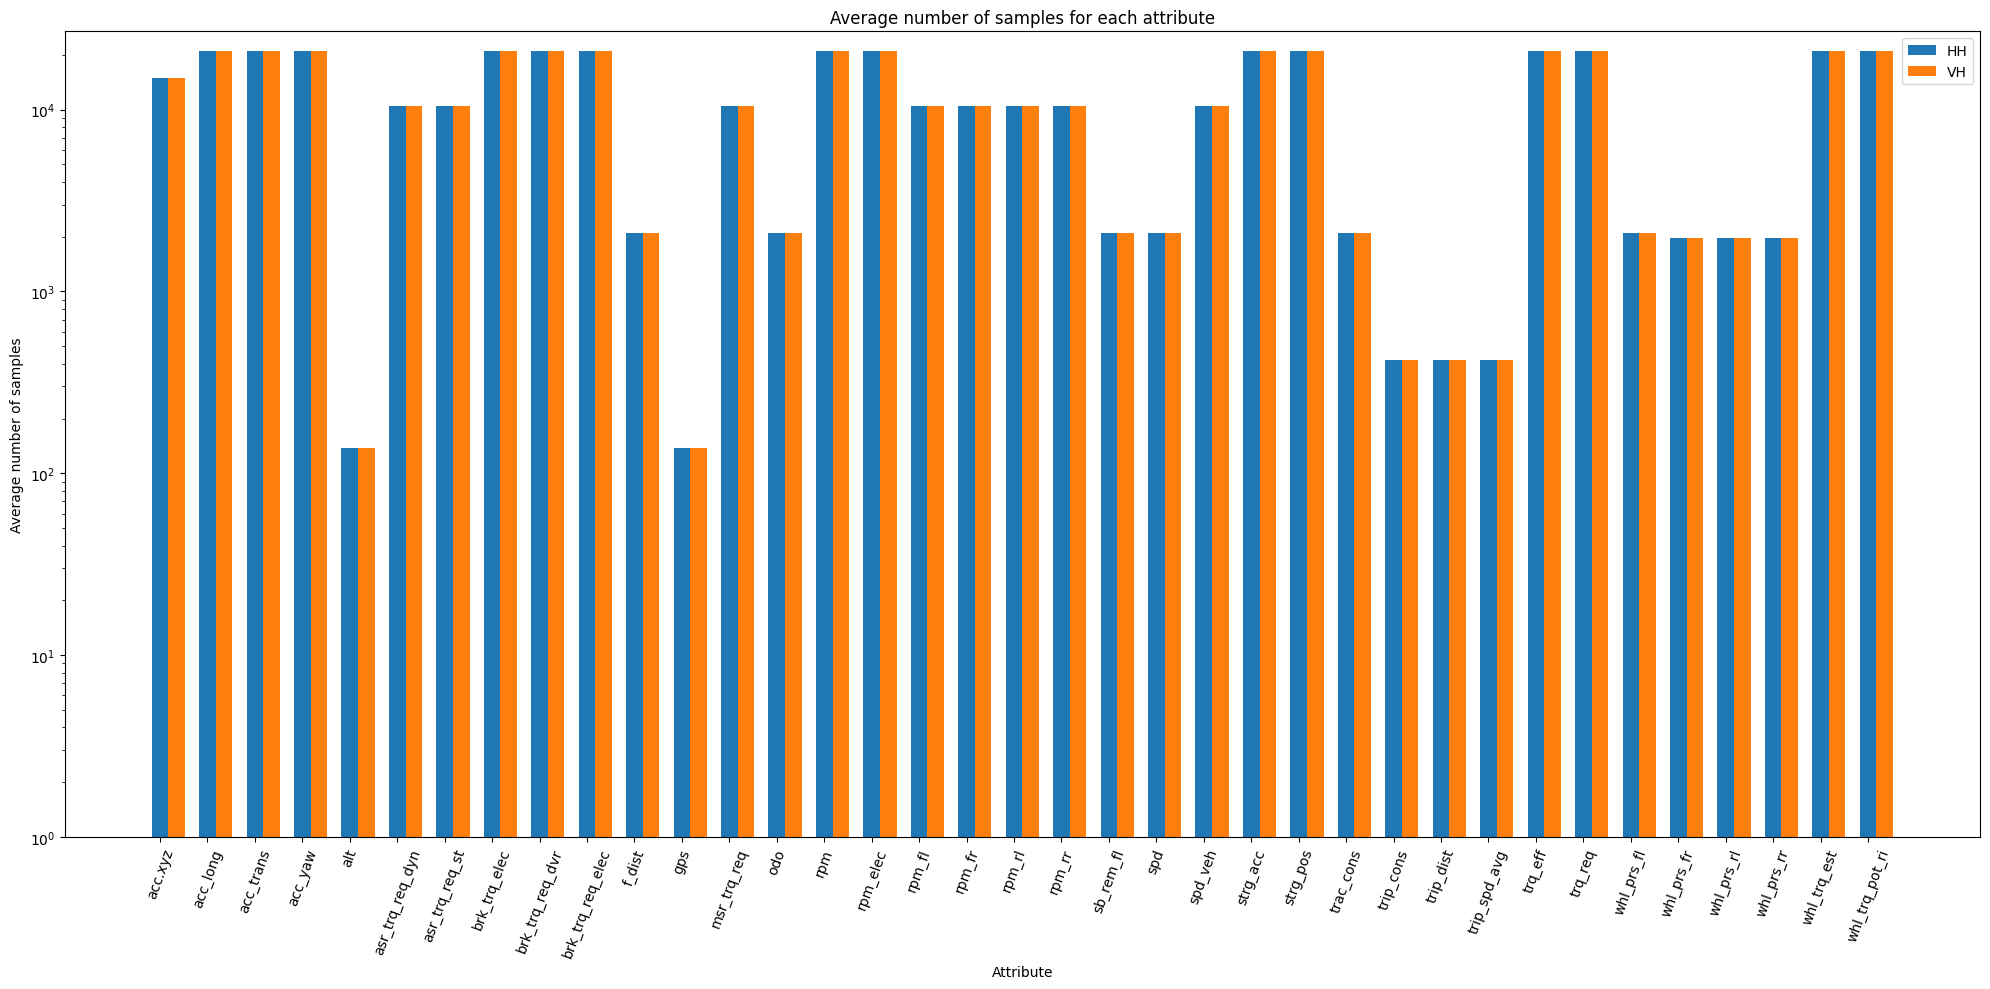

In [107]:
# # GM
attributes = data_autopi_hh['GM']['16006']['pass_1'].keys()
plot_average_number_of_samples('GM', attributes, log=False)
plot_average_number_of_samples('GM', attributes, log=True)


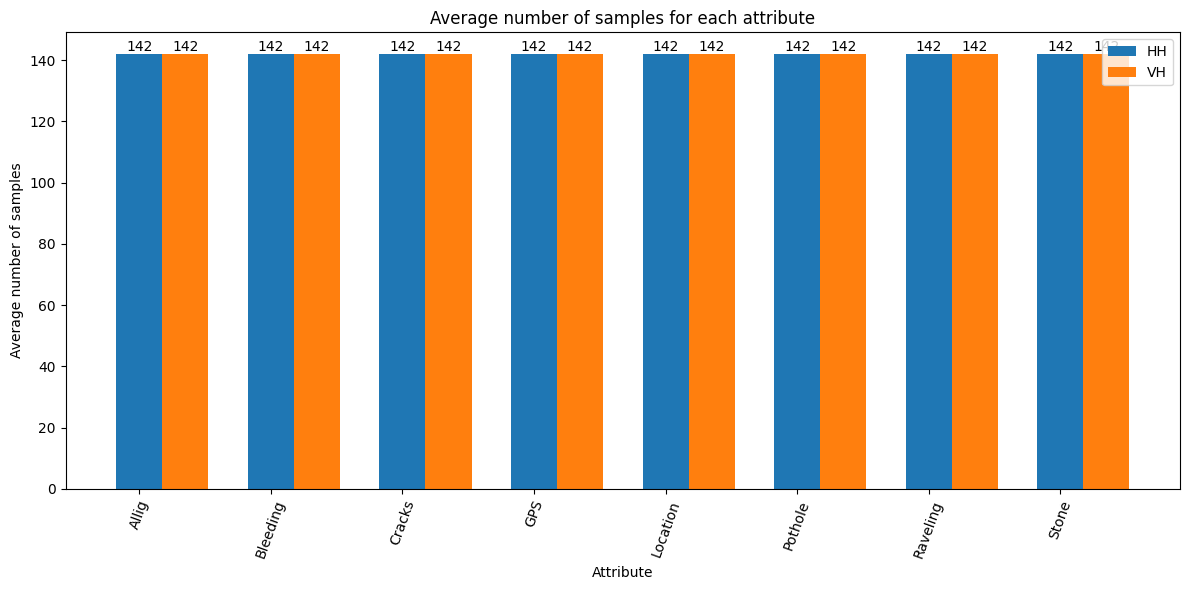

In [108]:
# # # aran
attributes = data_autopi_hh['aran']['trip_1']['pass_1'].keys()
plot_average_number_of_samples('aran', attributes, log=False, figsize=(12, 6), number_on_bars=True)


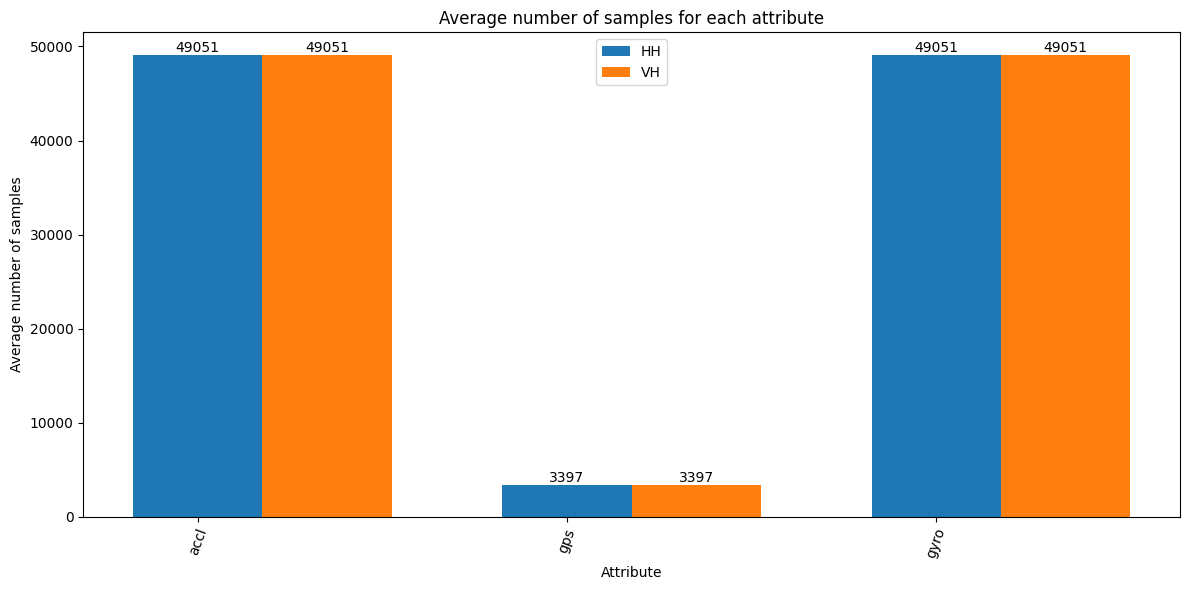

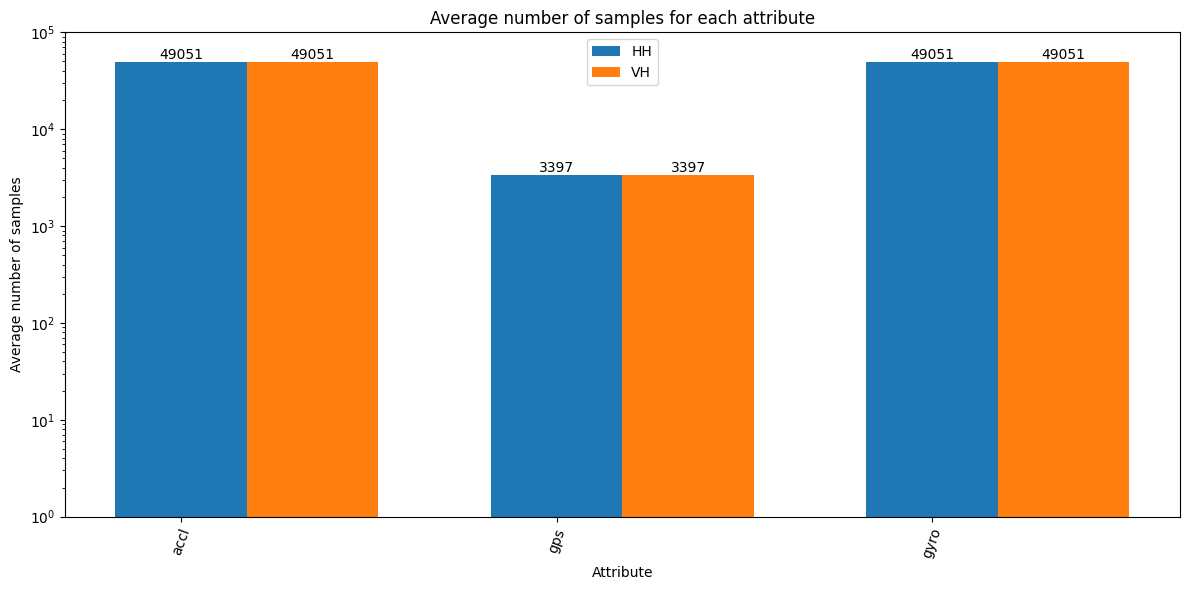

In [110]:
# # gopro
attributes = data_autopi_hh['gopro']['trip_1']['pass_1'].keys()
plot_average_number_of_samples('gopro', attributes, log=False, figsize=(12, 6), number_on_bars=True)
plot_average_number_of_samples('gopro', attributes, log=True, figsize=(12, 6), number_on_bars=True)

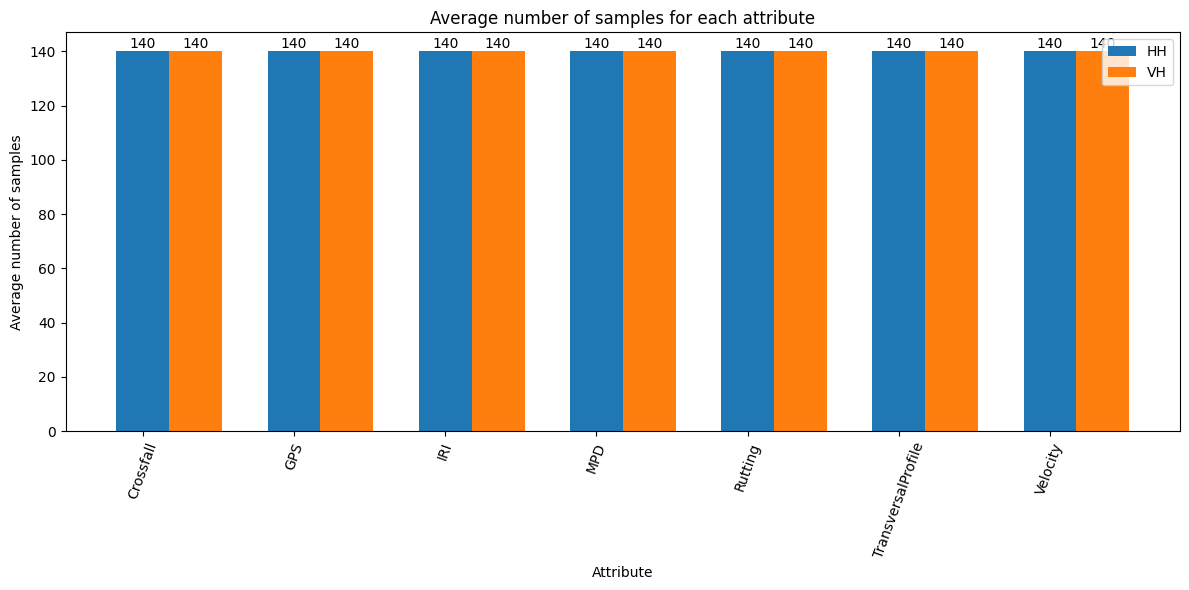

In [111]:
# p79
attributes = data_autopi_hh['p79']['trip_1']['pass_1'].keys()
plot_average_number_of_samples('p79', attributes, log=False, figsize=(12, 6), number_on_bars=True)